# Hash Function Distribution Examples
This notebook contains Python code examples for evaluating hash function distribution across buckets.

In [4]:
import matplotlib.pyplot as plt
from collections import defaultdict
import hashlib
import statistics

## Utility Function: Bucket Distribution

In [5]:
def bucket_distribution(data, num_buckets, hash_fn):
    buckets = defaultdict(list)
    for item in data:
        bucket = hash_fn(item) % num_buckets
        buckets[bucket].append(item)
    return buckets

## Hash Function Definitions

In [6]:
def poor_hash(key):
    return len(key)

def simple_ascii_sum(key):
    return sum(ord(char) for char in key)

def hash_sha256(key):
    return int(hashlib.sha256(key.encode()).hexdigest(), 16)

## Dataset and Plotting Utility

In [7]:
data = [f"key{i}" for i in range(1000)]
num_buckets = 10

def plot_distribution(title, counts):
    plt.bar(range(len(counts)), counts)
    plt.title(title)
    plt.xlabel("Bucket")
    plt.ylabel("# of Keys")
    plt.show()

## Example 1: Python Built-in hash()

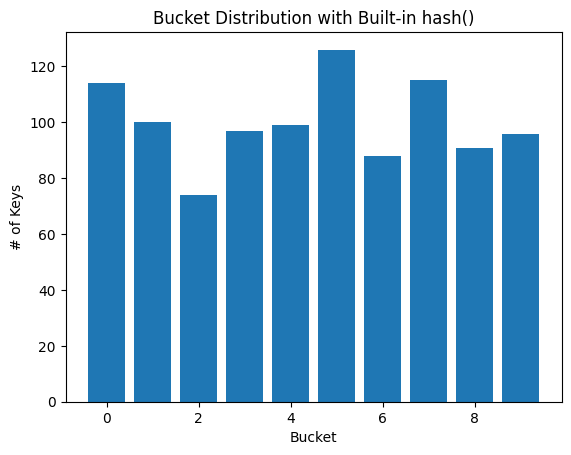

In [15]:
buckets = bucket_distribution(data, num_buckets, hash)
counts = [len(buckets[i]) for i in range(num_buckets)]
plot_distribution("Bucket Distribution with Built-in hash()", counts)

## Example 2: Poor Hash Function (len of key)

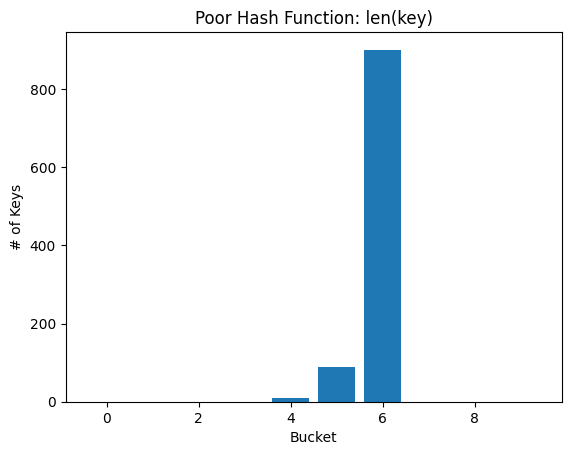

In [9]:
buckets = bucket_distribution(data, num_buckets, poor_hash)
counts = [len(buckets[i]) for i in range(num_buckets)]
plot_distribution("Poor Hash Function: len(key)", counts)

## Example 3: Simple ASCII Sum

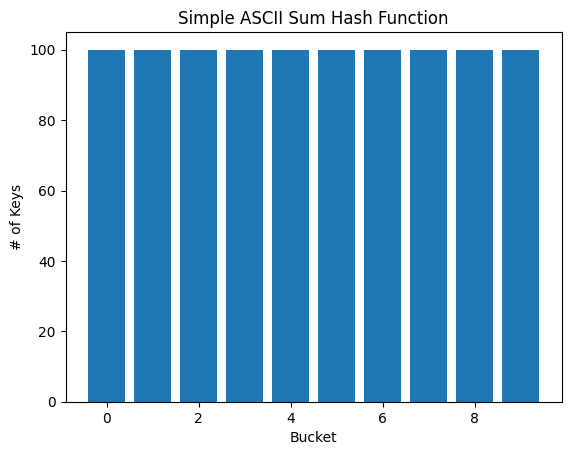

In [10]:
buckets = bucket_distribution(data, num_buckets, simple_ascii_sum)
counts = [len(buckets[i]) for i in range(num_buckets)]
plot_distribution("Simple ASCII Sum Hash Function", counts)

## Example 4: SHA-256

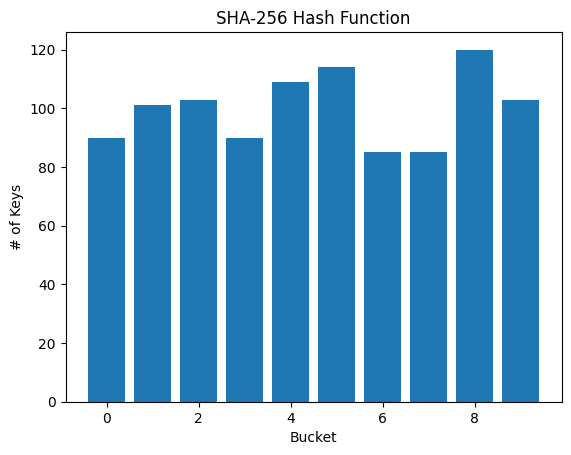

In [11]:
buckets = bucket_distribution(data, num_buckets, hash_sha256)
counts = [len(buckets[i]) for i in range(num_buckets)]
plot_distribution("SHA-256 Hash Function", counts)

## Metrics for Last Distribution

In [16]:
std_dev = statistics.stdev(counts)
max_bucket = max(counts)
collisions = sum(count - 1 for count in counts if count > 1)

print("=== Distribution Metrics ===")
print(f"Standard Deviation: {std_dev:.2f}")
print(f"Max Bucket Size: {max_bucket}")
print(f"Collisions: {collisions}")

=== Distribution Metrics ===
Standard Deviation: 15.00
Max Bucket Size: 126
Collisions: 990


Reflective Prompt 1: What surprised me the most was how dissimilar each bucket was in the built-in hash map as I had expected them all to be more-or-less the same, as in they would all have the same (or similar) number of keys, and hence a smaller standard deviation. The graph of the poor hash function also caught me off-guard as I can infer the number of collisions being very great.

Reflective Prompt 2:
My main goal would be to avoid as many collisions as possible, so I would try to spread apart the inputs evenly over all the buckets. I also want to highlight more sensitivity to change--if the input changes even slightly, the resulting hash values changes a lot. A bad hash function may break if inputs result in similar hash values that land in the same buckets, like perhaps similar inputs may not be distinguished hard enough as "different values" to result in varying hash values if that makes sense.